In [1]:
## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2023-ml-w6p2/submit.csv
/kaggle/input/2023-ml-w6p2/train.csv
/kaggle/input/2023-ml-w6p2/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/2023-ml-w6p2/train.csv")
test = pd.read_csv("/kaggle/input/2023-ml-w6p2/test.csv")
submit = pd.read_csv("/kaggle/input/2023-ml-w6p2/submit.csv")

In [3]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,1,95,60,18,58,23.9,0.260,22,0
1,5,105,72,29,325,36.9,0.159,28,0
2,0,135,68,42,250,42.3,0.365,24,1
3,4,131,68,21,166,33.1,0.160,28,0
4,1,103,30,38,83,43.3,0.183,33,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               537 non-null    int64  
 1   Glucose                   537 non-null    int64  
 2   BloodPressure             537 non-null    int64  
 3   SkinThickness             537 non-null    int64  
 4   Insulin                   537 non-null    int64  
 5   BMI                       537 non-null    float64
 6   DiabetesPedigreeFunction  537 non-null    float64
 7   Age                       537 non-null    int64  
 8   Diabetes                  537 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 37.9 KB


In [5]:
x = train.drop(["Diabetes"],axis=1)
y = train["Diabetes"]

In [6]:
y = np.squeeze(y)

In [7]:
np.sum(y == 0)

349

In [8]:
np.sum(y == 1)

188

In [9]:
print(349/(349+188),188/(349+188))

0.6499068901303539 0.3500931098696462


In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x)
x = ss.transform(x)
test = ss.transform(test)

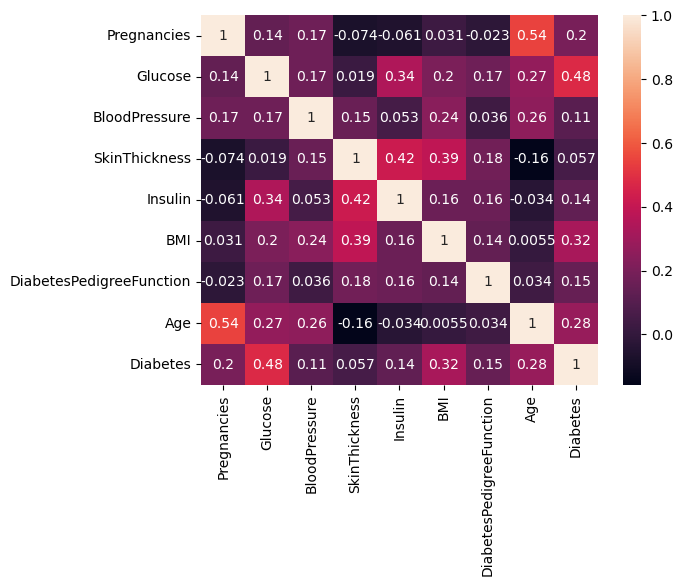

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(train.corr(), annot=True)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(x,y, test_size=0.3, random_state=4, stratify=y)

In [13]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

for i in range(1,6):
    print("i :", i)
    print()
    for j in range(1,6):
        qda=QuadraticDiscriminantAnalysis(priors = [i*0.16, (1-i*0.16)],reg_param=0.2*j)

        qda.fit(X_train, Y_train)
        Y_train_pred=qda.predict(X_train)
        Y_test_pred=qda.predict(X_test)

        print("j :", j)
        print(accuracy_score(Y_train, Y_train_pred)) # train data에 대한 accuracy
        print(accuracy_score(Y_test, Y_test_pred)) 
        print()
    print()

i : 1

j : 1
0.6506666666666666
0.7222222222222222

j : 2
0.624
0.6728395061728395

j : 3
0.5973333333333334
0.6296296296296297

j : 4
0.5733333333333334
0.6234567901234568

j : 5
0.56
0.6049382716049383


i : 2

j : 1
0.72
0.7222222222222222

j : 2
0.7173333333333334
0.7407407407407407

j : 3
0.7013333333333334
0.7654320987654321

j : 4
0.696
0.7530864197530864

j : 5
0.6853333333333333
0.7592592592592593


i : 3

j : 1
0.7946666666666666
0.7160493827160493

j : 2
0.8
0.7283950617283951

j : 3
0.784
0.7407407407407407

j : 4
0.7573333333333333
0.7530864197530864

j : 5
0.7333333333333333
0.7592592592592593


i : 4

j : 1
0.7813333333333333
0.7222222222222222

j : 2
0.7866666666666666
0.7222222222222222

j : 3
0.784
0.7283950617283951

j : 4
0.776
0.7345679012345679

j : 5
0.7653333333333333
0.7469135802469136


i : 5

j : 1
0.784
0.7283950617283951

j : 2
0.7786666666666666
0.7469135802469136

j : 3
0.76
0.7407407407407407

j : 4
0.752
0.7469135802469136

j : 5
0.7546666666666667
0.75

In [14]:
qda=QuadraticDiscriminantAnalysis(priors = [4*0.16, (1-4*0.16)],reg_param=0.2*1)

qda.fit(x, y)
test_pred=qda.predict(test)

submit['Diabetes'] = test_pred
submit.to_csv("submit.csv", mode='w', header= True, index= False)

In [15]:
submit

,ID,Diabetes
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
226,226,1
227,227,0
228,228,0
229,229,0
